In [44]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

### Simple pendulum 

* $x = \cos(\theta)$
* $y = \sin(\theta)$
* $T = \frac{1}{2} m (\dot{x}^2 + \dot{y}^2)$
* $V = - m g y$

Then the Lagrangian can be written as: 
* $L = T -V = \frac{1}{2} m (\dot{x}^2 + \dot{y}^2) + m g y$

Then the lagrange's equations becomes: 
* $\frac{\partial L}{\partial \theta} - \frac{d}{dt}(\frac{\partial L}{\partial \dot{\theta}}) = 0$
* solution to above equation is second order differential equation, which can be simplify as two coupled ODEs

* $\ddot{\theta}=f_2(g,\theta,\dot{\theta})$ and $\dot{\theta} = f_1(\dot{\theta})$
* $\frac{d}{dt}\begin{bmatrix}
    \theta\\
    \dot{\theta}
    \end{bmatrix} = \begin{bmatrix}
    \dot{\theta}\\
    \ddot{\theta}
    \end{bmatrix} = \begin{bmatrix}
    f_1(\dot{\theta})\\
    f_2(g,m,\theta,\dot{\theta})
    \end{bmatrix}$ , This will be clear if you check the below code and try to understand it!!

In [14]:
# define the constants and variables 
m,t,g = smp.symbols('m,t,g')
theta =smp.Function('theta')(t)
x = smp.Function('x')(theta)
y = smp.Function('y')(theta)

In [25]:
# define the lagrangian usiing the variables/constants 
x = smp.cos(theta)
y = smp.sin(theta)
T =  1/2 * m * ((smp.diff(x,t))**2 + (smp.diff(y,t))**2) 
V =  m *g * y
L = T - V

In [26]:
L

-g*m*sin(theta(t)) + 0.5*m*(sin(theta(t))**2*Derivative(theta(t), t)**2 + cos(theta(t))**2*Derivative(theta(t), t)**2)

In [27]:
# get the lagrangian equations 
d_theta = smp.diff(theta,t)
LE = smp.diff(L,theta) - smp.diff(smp.diff(L,d_theta),t)

In [34]:
# solve for LE 
dd_theta = smp.diff(d_theta)
deriv_2 = smp.solve(LE,dd_theta)[0]
deriv_1 = d_theta

In [37]:
deriv_1

Derivative(theta(t), t)

In [38]:
deriv_2

-g*cos(theta(t))

In [40]:
# create the numpy functions from simpy solutions to LEs
deriv2_f = smp.lambdify((g,theta,d_theta),deriv_2)
deriv1_f = smp.lambdify((d_theta),deriv_1)

In [42]:
# define function to solve for the ODE 
def dsdt(S,t):
    s1,s2 = S
    return [deriv1_f(s1),
            deriv2_f(g,s1,s2)]

In [46]:
# solve the ode using scipy odeint 
t = np.linspace(0,20,1000)
g = 9.81
sol = odeint(dsdt,y0=(np.pi/4,0),t=t)

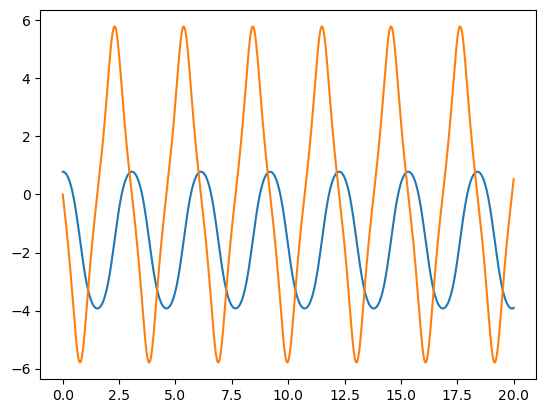

In [49]:
# plot the solutions 
plt.plot(t,sol.T[0])
plt.plot(t,sol.T[1])